In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [93]:
#src_file_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/137_CreditCard_id_1_Finance_tr_500_1st_541.csv'
#src_file_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/042_GHL_id_11_Sensor_tr_50000_1st_150001.csv'
#src_file_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/074_SMD_id_18_Facility_tr_7174_1st_21230.csv'
# pw
src_file_paths = [
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/002_MSL_id_1_Sensor_tr_500_1st_900.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/003_MSL_id_2_Sensor_tr_883_1st_1238.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/005_MSL_id_4_Sensor_tr_855_1st_2700.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/006_MSL_id_5_Sensor_tr_1150_1st_1250.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/007_MSL_id_6_Sensor_tr_980_1st_3550.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/008_MSL_id_7_Sensor_tr_656_1st_1630.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/009_MSL_id_8_Sensor_tr_714_1st_1390.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/010_MSL_id_9_Sensor_tr_554_1st_1172.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/012_MSL_id_11_Sensor_tr_539_1st_940.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/013_MSL_id_12_Sensor_tr_554_1st_1200.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/014_MSL_id_13_Sensor_tr_1525_1st_4575.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/015_MSL_id_14_Sensor_tr_575_1st_1250.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/016_MSL_id_15_Sensor_tr_500_1st_780.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/017_MSL_id_16_Sensor_tr_512_1st_1850.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/042_GHL_id_11_Sensor_tr_50000_1st_150001.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/065_SMD_id_9_Facility_tr_737_1st_837.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/073_SMD_id_17_Facility_tr_5926_1st_10620.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/078_SMD_id_22_Facility_tr_500_1st_326.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/115_PSM_id_1_Facility_tr_50000_1st_129872.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/130_OPPORTUNITY_id_2_HumanActivity_tr_1045_1st_1145.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/144_SMAP_id_1_Sensor_tr_2052_1st_5300.csv',
    '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M/173_GECCO_id_1_Sensor_tr_16165_1st_16265.csv',
]
dfs = [pd.read_csv(src_file_path) for src_file_path in src_file_paths]
datas = [df.iloc[:, :-1].values for df in dfs]
#label = df.iloc[:, -1].values

In [94]:
def plot_pca(data, title, variance_threshold=0.9, plot=True):

    # normalize data
    #data = (data - np.mean(data, axis=0)) / (np.std(data, axis=0) + 1e-8)

    C = data.shape[1]
    pca_full = PCA(n_components=C)
    pca_full.fit(data)
    # 누적 설명력 계산
    cumsum = np.cumsum(pca_full.explained_variance_ratio_)
    k = np.searchsorted(cumsum, variance_threshold) + 1

    # 상위 k개의 PC만 사용
    components = pca_full.components_[:k, :]                  # shape: (k, C)
    weights = pca_full.explained_variance_ratio_[:k]          # shape: (k,)

    # 채널별 importance 계산 (가중 합)
    importance = np.sum(np.abs(components) * weights[:, np.newaxis], axis=0)
    importance = importance / np.sum(importance)  # normalize to sum = 1

    # KMeans 클러스터링 (2개 클러스터)
    kmeans = KMeans(n_clusters=2, random_state=0)
    labels = kmeans.fit_predict(importance.reshape(-1, 1))  # shape: (C,)

    # sort indices
    indices = np.argsort(importance)[::-1]
    print("Feature importance (sorted)(top-3, bottom-3):")
    for cnt, i in enumerate(indices):
        # print top-3 and bottom-3
        if cnt < 3:
            print(f"Feature {i}: {importance[i]:.4f}, cluster={labels[i]}")
        elif cnt >= C - 3:
            print(f"Feature {i}: {importance[i]:.4f}, cluster={labels[i]}")
    # 결과 출력
    sorted_idx = np.argsort(importance)[::-1]

    selected_indices = indices[labels[indices] == labels[indices[0]]]

    # importance 기준 상위 20% 특징 선택
    top_20_percent = int(len(importance) * 0.2)
    selected_indices_top20 = sorted_idx[:top_20_percent]

    print(f"Selected features (cluster {labels[indices[0]]}): {selected_indices[:]}")
    print(f"Selected features (top 20%): {selected_indices_top20[:]}")

    '''
    print(f"Top-5 feature importance (using top {k} PCs covering {cumsum[k-1]*100:.1f}% variance):")
    for cnt, i in enumerate(sorted_idx[:5]):
        print(f"Feature {i}: importance={importance[i]:.4f}, cluster={labels[i]}")
    '''

    if plot:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(C), importance[sorted_idx], align='center', color=['red' if labels[i] == 1 else 'blue' for i in sorted_idx])
        plt.xticks(range(C), sorted_idx, rotation=45, fontsize=10)
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.title(f"{title}\n(Top {k} PCs covering {cumsum[k-1]*100:.1f}% variance)")
        plt.tight_layout()
        plt.show()

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 5: 0.2179, cluster=1
Feature 49: 0.1916, cluster=1
Feature 35: 0.1445, cluster=1
Feature 14: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Feature 15: 0.0000, cluster=0
Selected features (cluster 1): [ 5 49 35 11 39 47]
Selected features (top 20%): [ 5 49 35 11 39 47 27 12 33 31  0]


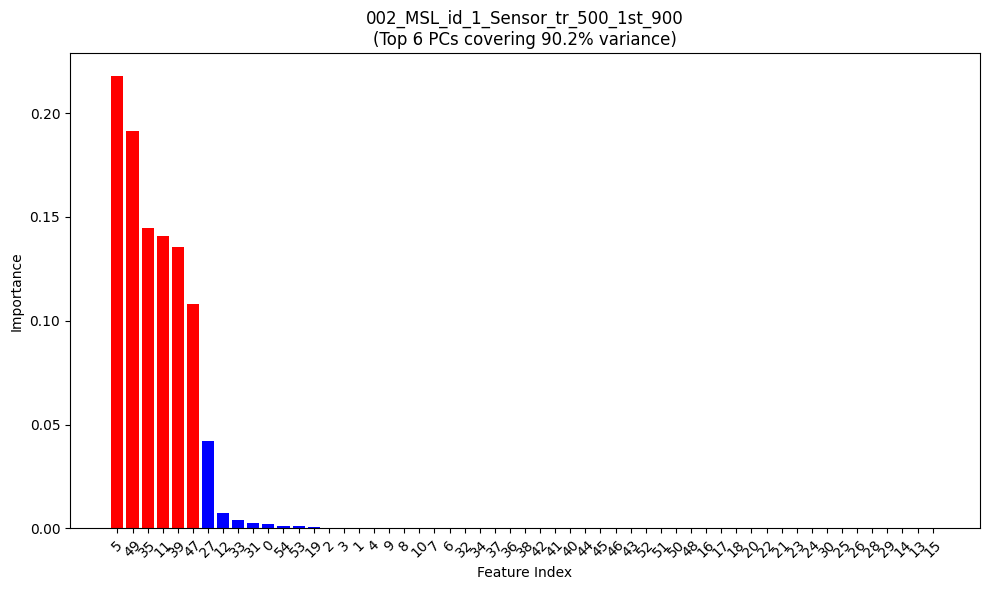

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.2519, cluster=1
Feature 5: 0.2515, cluster=1
Feature 27: 0.1325, cluster=1
Feature 14: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Feature 15: 0.0000, cluster=0
Selected features (cluster 1): [ 0  5 27 47 33]
Selected features (top 20%): [ 0  5 27 47 33 11 12 49 39 20 41]


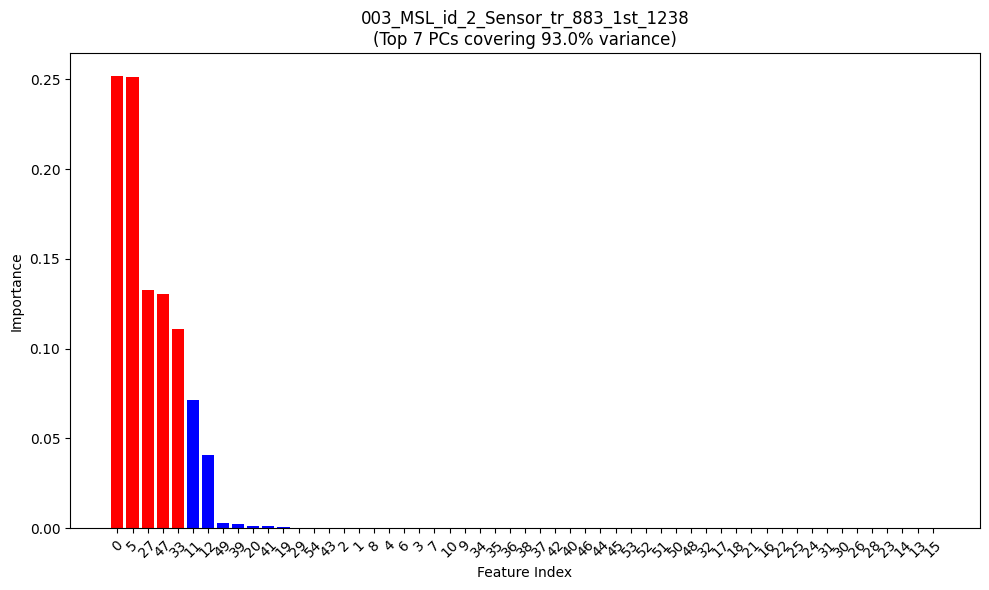

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.7494, cluster=1
Feature 5: 0.0989, cluster=0
Feature 11: 0.0659, cluster=0
Feature 15: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Feature 7: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0  5 11 27 12 19 47 43 41 54 53]


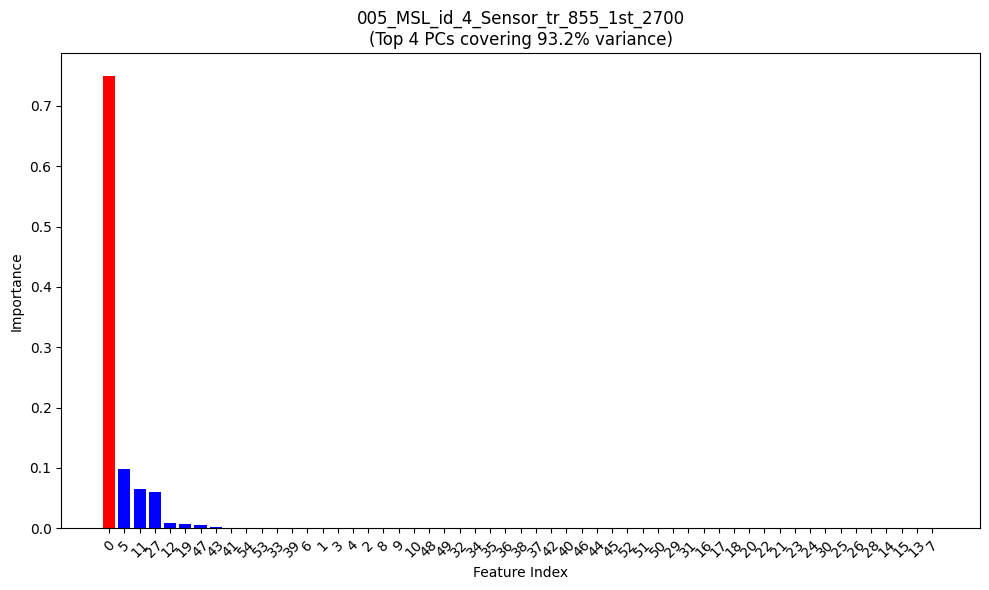

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.8197, cluster=1
Feature 5: 0.0705, cluster=0
Feature 33: 0.0655, cluster=0
Feature 10: 0.0000, cluster=0
Feature 7: 0.0000, cluster=0
Feature 6: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0  5 33 11 47 27 12 53 54 43 19]


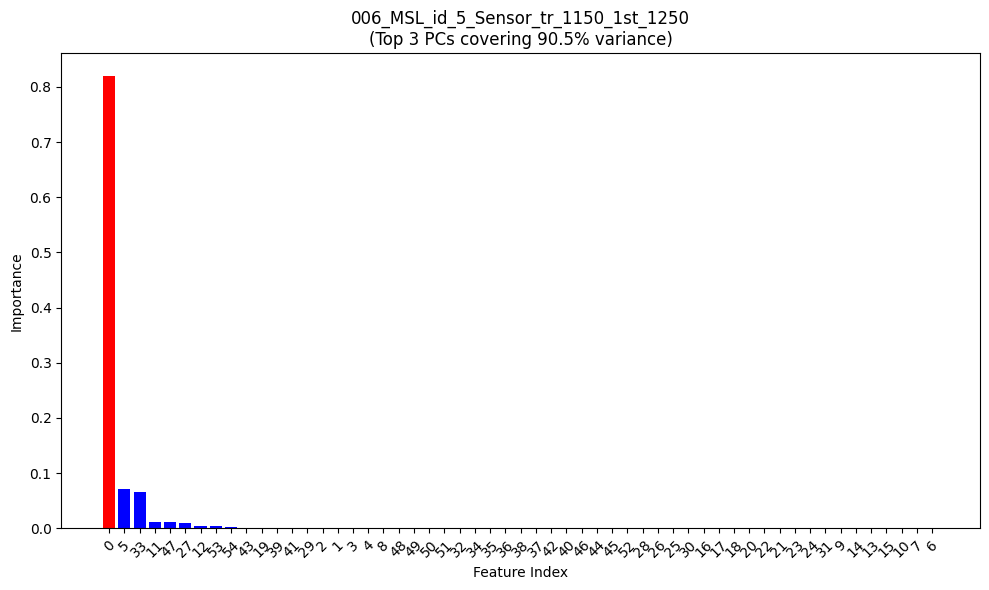

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.9869, cluster=1
Feature 11: 0.0049, cluster=0
Feature 5: 0.0025, cluster=0
Feature 3: 0.0000, cluster=0
Feature 2: 0.0000, cluster=0
Feature 1: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0 11  5 19 12 27 43 47 41 39 33]


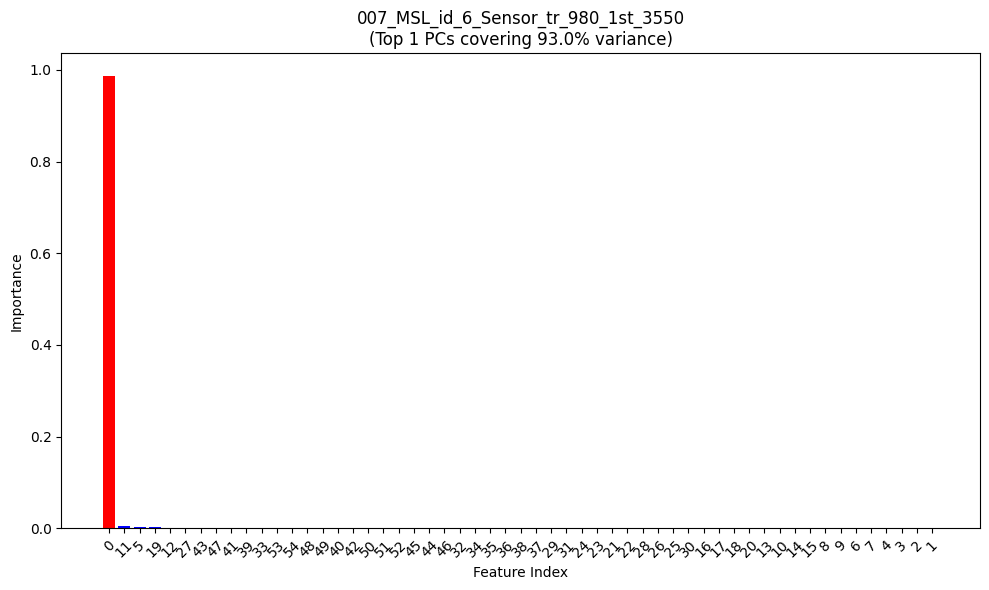

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.3062, cluster=1
Feature 14: 0.2461, cluster=1
Feature 13: 0.2341, cluster=1
Feature 46: 0.0000, cluster=0
Feature 22: 0.0000, cluster=0
Feature 30: 0.0000, cluster=0
Selected features (cluster 1): [ 0 14 13]
Selected features (top 20%): [ 0 14 13  5 11 12 47 27 33 49  7]


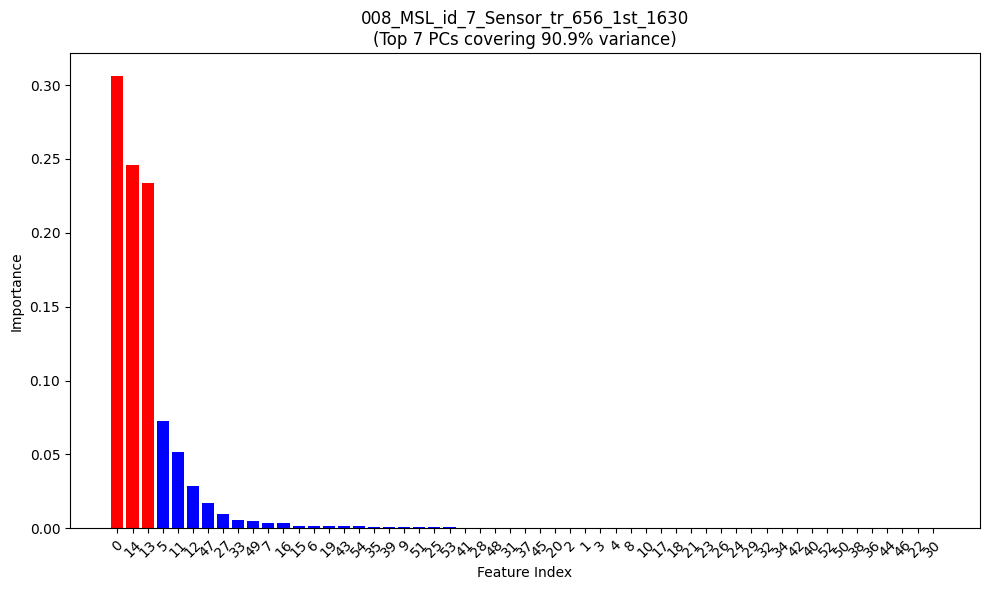

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.9889, cluster=1
Feature 11: 0.0030, cluster=0
Feature 27: 0.0021, cluster=0
Feature 3: 0.0000, cluster=0
Feature 2: 0.0000, cluster=0
Feature 1: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0 11 27 12  5 41 47 31 29 33 19]


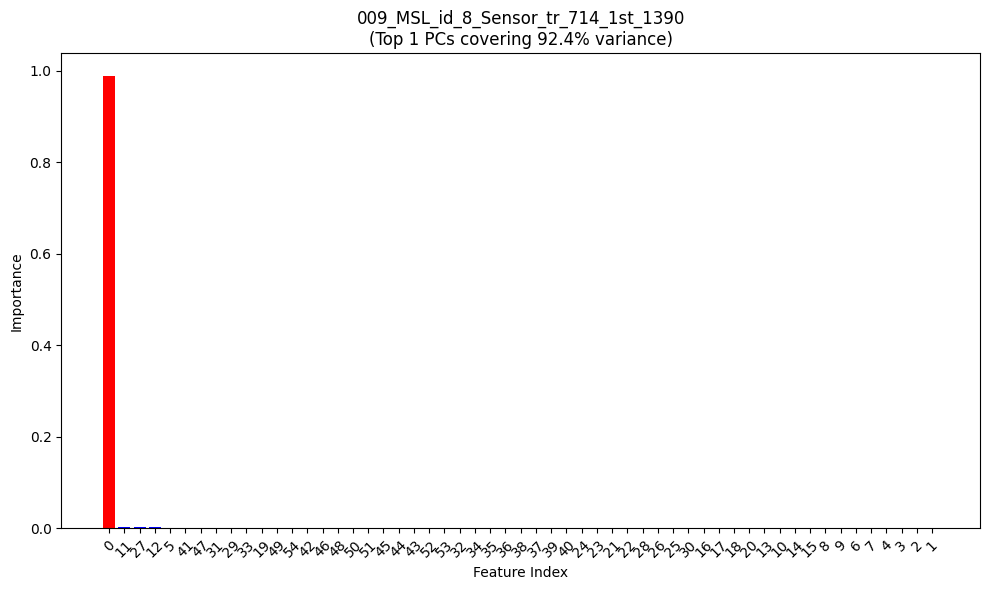

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.4140, cluster=1
Feature 5: 0.2346, cluster=1
Feature 11: 0.1254, cluster=0
Feature 15: 0.0000, cluster=0
Feature 14: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Selected features (cluster 1): [0 5]
Selected features (top 20%): [ 0  5 11 12 27 47 43 19 54 53 20]


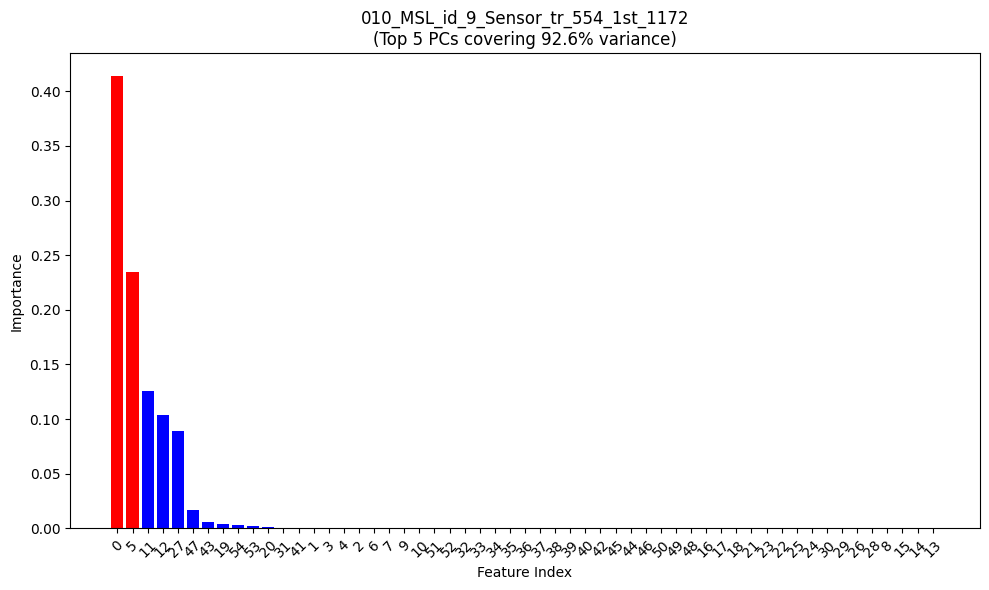

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 5: 0.2851, cluster=1
Feature 33: 0.2338, cluster=1
Feature 0: 0.1642, cluster=1
Feature 14: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Feature 15: 0.0000, cluster=0
Selected features (cluster 1): [ 5 33  0 11]
Selected features (top 20%): [ 5 33  0 11 12 27 47 19 54 20 53]


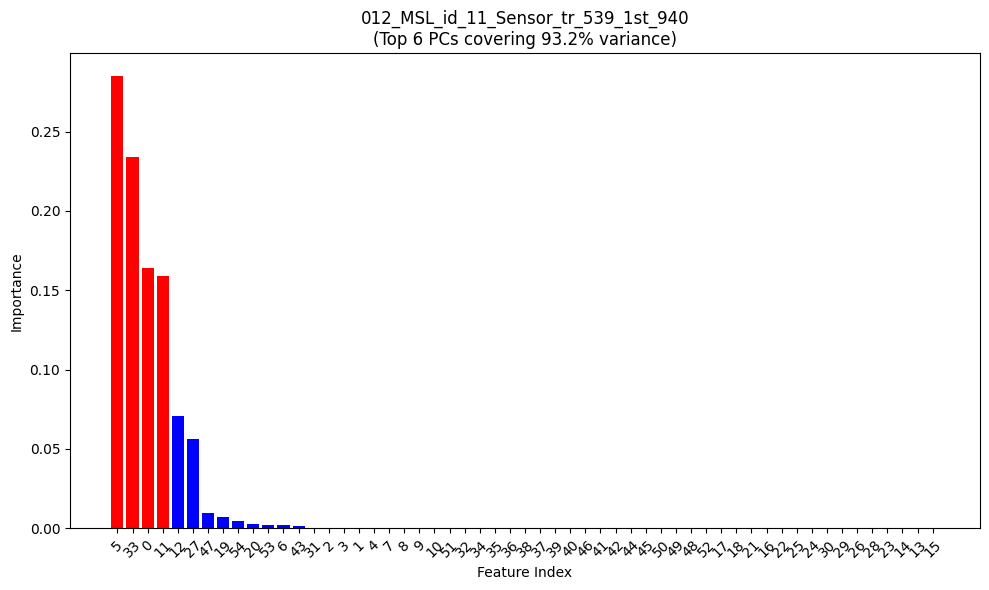

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 5: 0.3404, cluster=1
Feature 11: 0.1911, cluster=1
Feature 27: 0.1851, cluster=1
Feature 14: 0.0000, cluster=0
Feature 10: 0.0000, cluster=0
Feature 13: 0.0000, cluster=0
Selected features (cluster 1): [ 5 11 27 12]
Selected features (top 20%): [ 5 11 27 12 47  0 43 19 54 20 31]


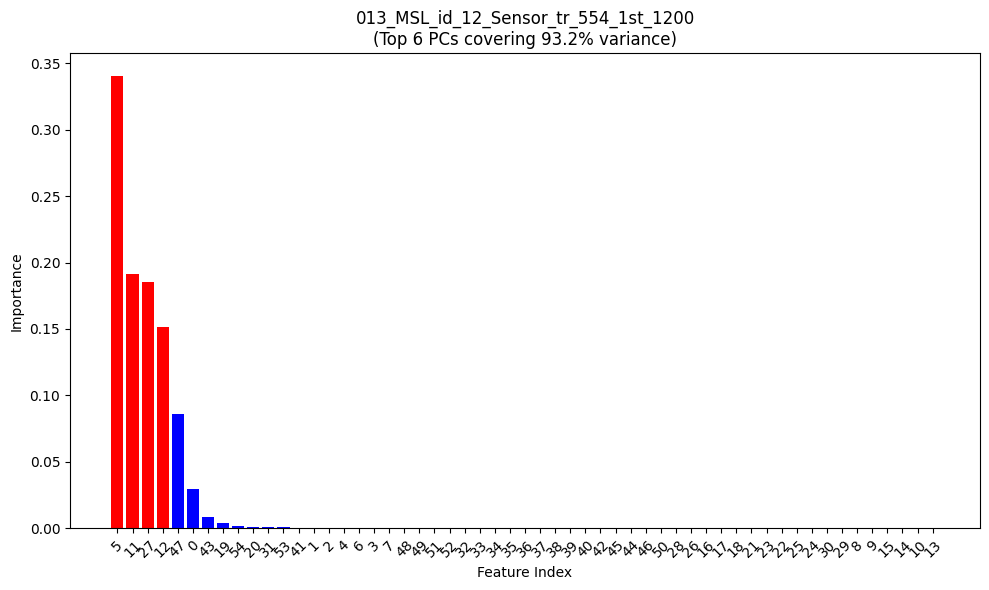

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.7917, cluster=1
Feature 14: 0.0965, cluster=0
Feature 13: 0.0790, cluster=0
Feature 26: 0.0000, cluster=0
Feature 10: 0.0000, cluster=0
Feature 7: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0 14 13  5 11 27 47 33 12  6 15]


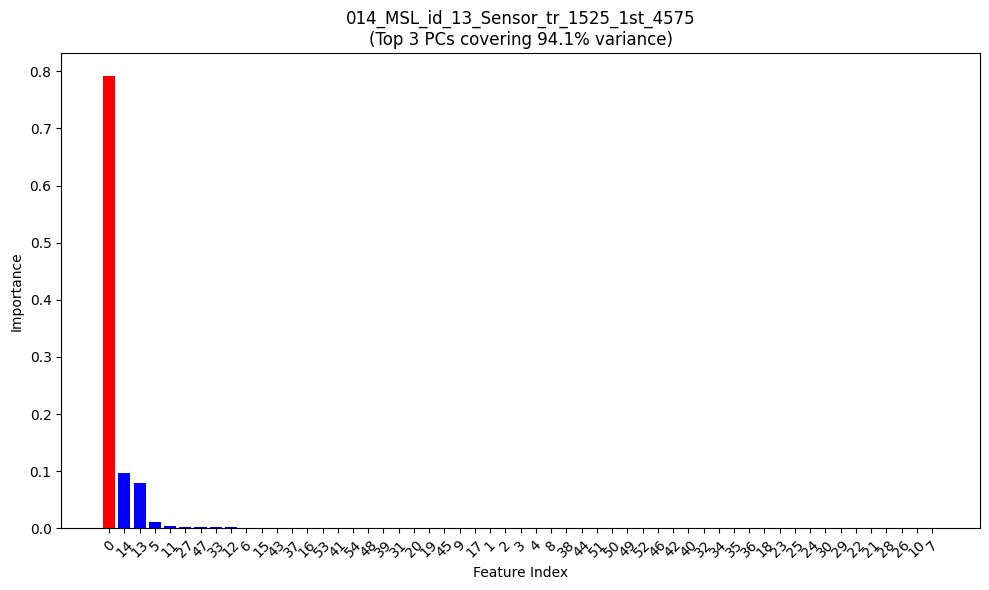

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.5642, cluster=1
Feature 5: 0.2147, cluster=0
Feature 33: 0.1689, cluster=0
Feature 14: 0.0000, cluster=0
Feature 7: 0.0000, cluster=0
Feature 6: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0  5 33 11 19 12 27 41 47 20 53]


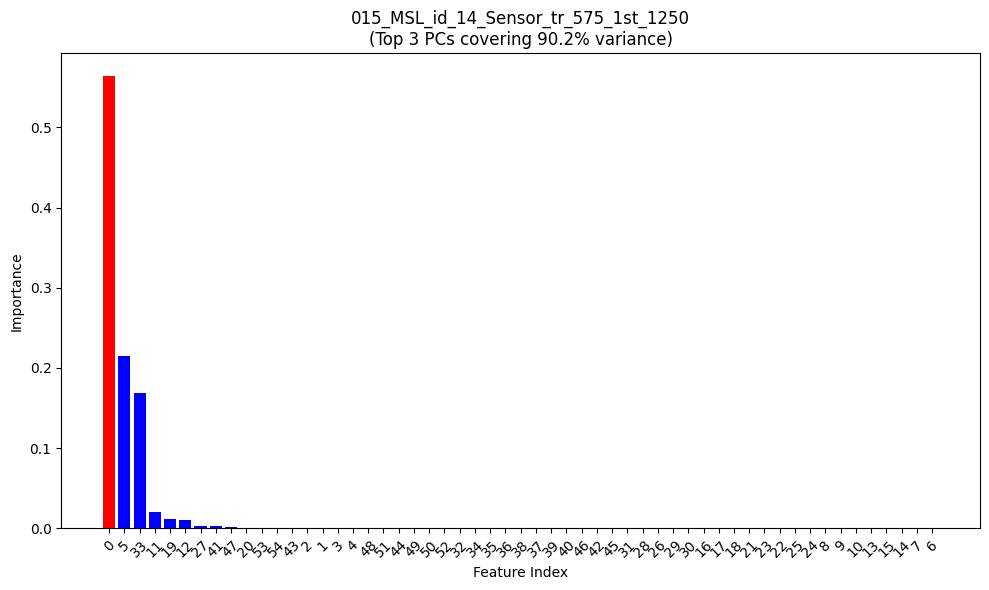

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 14: 0.3159, cluster=1
Feature 13: 0.2902, cluster=1
Feature 5: 0.1116, cluster=0
Feature 29: 0.0000, cluster=0
Feature 26: 0.0000, cluster=0
Feature 30: 0.0000, cluster=0
Selected features (cluster 1): [14 13]
Selected features (top 20%): [14 13  5  0 11 12 16 33 27 15 31]


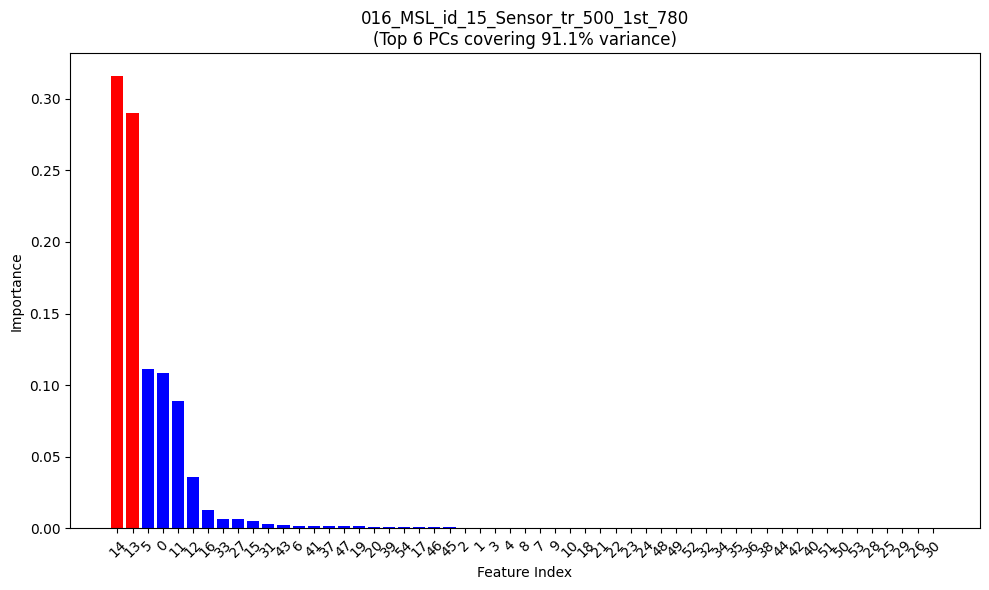

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 0: 0.9994, cluster=1
Feature 47: 0.0001, cluster=0
Feature 11: 0.0001, cluster=0
Feature 3: 0.0000, cluster=0
Feature 2: 0.0000, cluster=0
Feature 1: 0.0000, cluster=0
Selected features (cluster 1): [0]
Selected features (top 20%): [ 0 47 11 20 33 39 54 12 53 19 43]


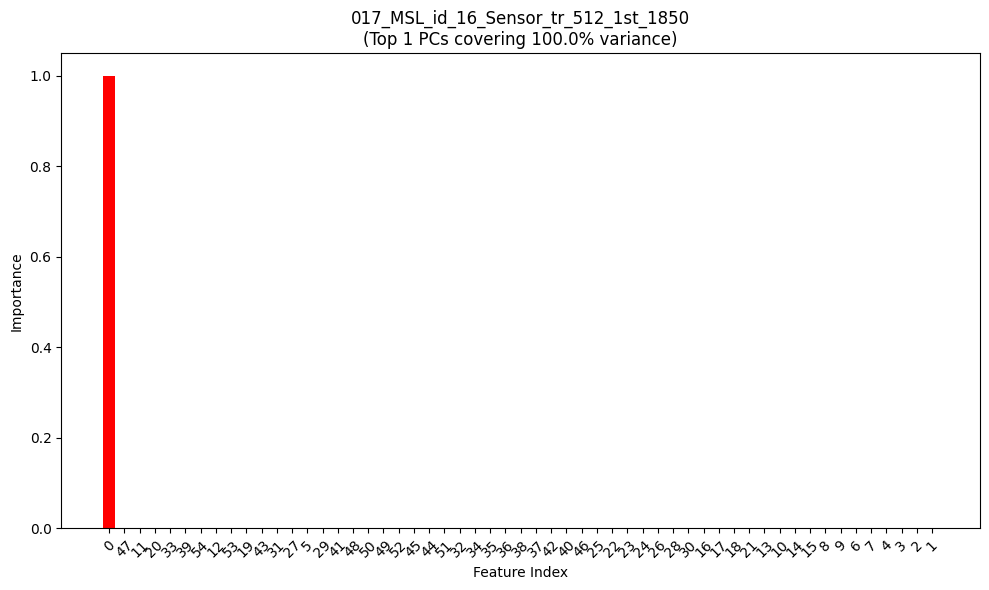

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 1: 0.2209, cluster=0
Feature 14: 0.1921, cluster=0
Feature 2: 0.1749, cluster=0
Feature 4: 0.0007, cluster=1
Feature 6: 0.0005, cluster=1
Feature 11: 0.0002, cluster=1
Selected features (cluster 0): [ 1 14  2 17  7 10]
Selected features (top 20%): [ 1 14  2]


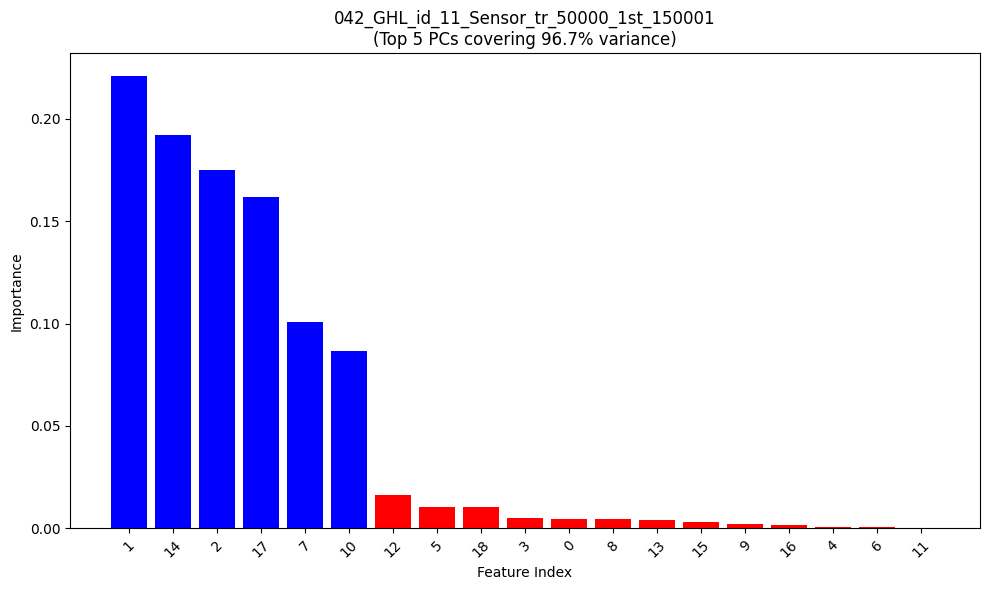

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 22: 0.0874, cluster=0
Feature 20: 0.0818, cluster=0
Feature 27: 0.0817, cluster=0
Feature 36: 0.0000, cluster=1
Feature 26: 0.0000, cluster=1
Feature 7: 0.0000, cluster=1
Selected features (cluster 0): [22 20 27 19 24 21 30 18 35 34 31 25]
Selected features (top 20%): [22 20 27 19 24 21 30]


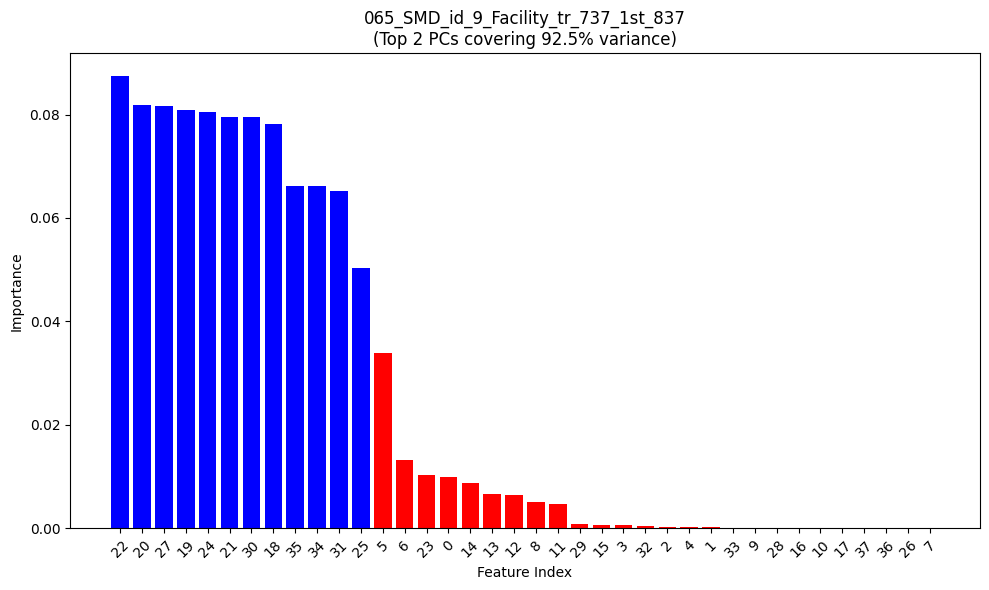

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 5: 0.1449, cluster=0
Feature 15: 0.1001, cluster=0
Feature 30: 0.0801, cluster=0
Feature 17: 0.0000, cluster=1
Feature 28: 0.0000, cluster=1
Feature 26: 0.0000, cluster=1
Selected features (cluster 0): [ 5 15 30 24 22 35 34 13 14 27  8]
Selected features (top 20%): [ 5 15 30 24 22 35 34]


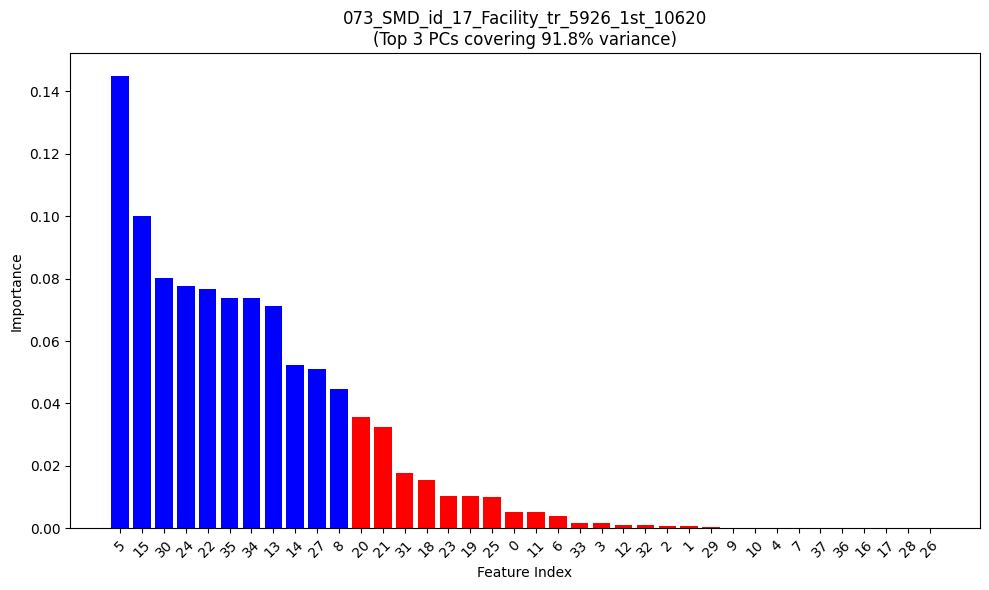

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 6: 0.1715, cluster=1
Feature 25: 0.1292, cluster=1
Feature 23: 0.1285, cluster=1
Feature 17: 0.0000, cluster=0
Feature 28: 0.0000, cluster=0
Feature 26: 0.0000, cluster=0
Selected features (cluster 1): [ 6 25 23]
Selected features (top 20%): [ 6 25 23  0 34  3  2]


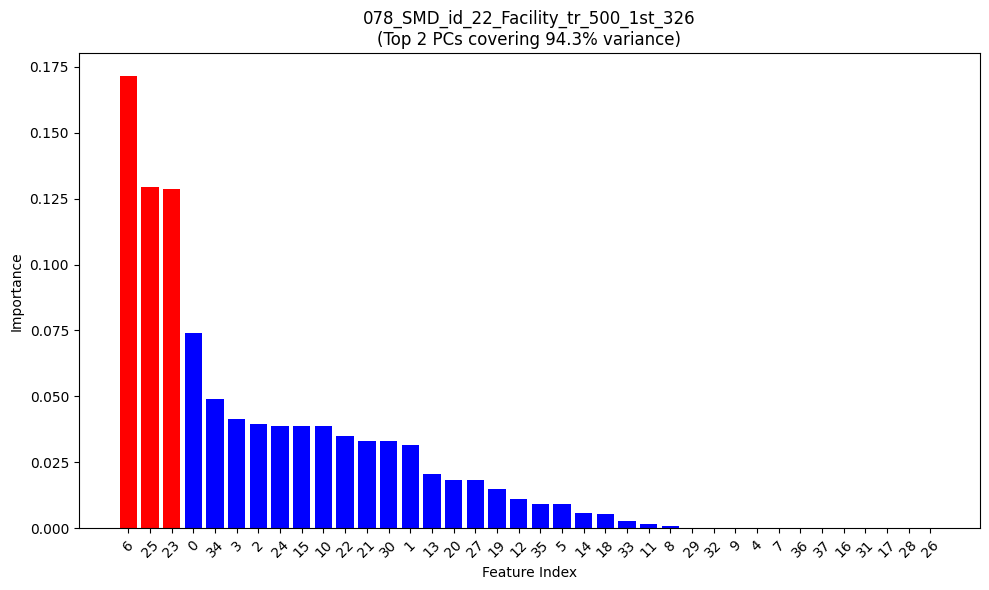

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 23: 0.0676, cluster=1
Feature 18: 0.0661, cluster=1
Feature 4: 0.0612, cluster=1
Feature 13: 0.0046, cluster=0
Feature 21: 0.0016, cluster=0
Feature 20: 0.0013, cluster=0
Selected features (cluster 1): [23 18  4 11 22  7  9  8  2 16 10  5  3 24  6]
Selected features (top 20%): [23 18  4 11 22]


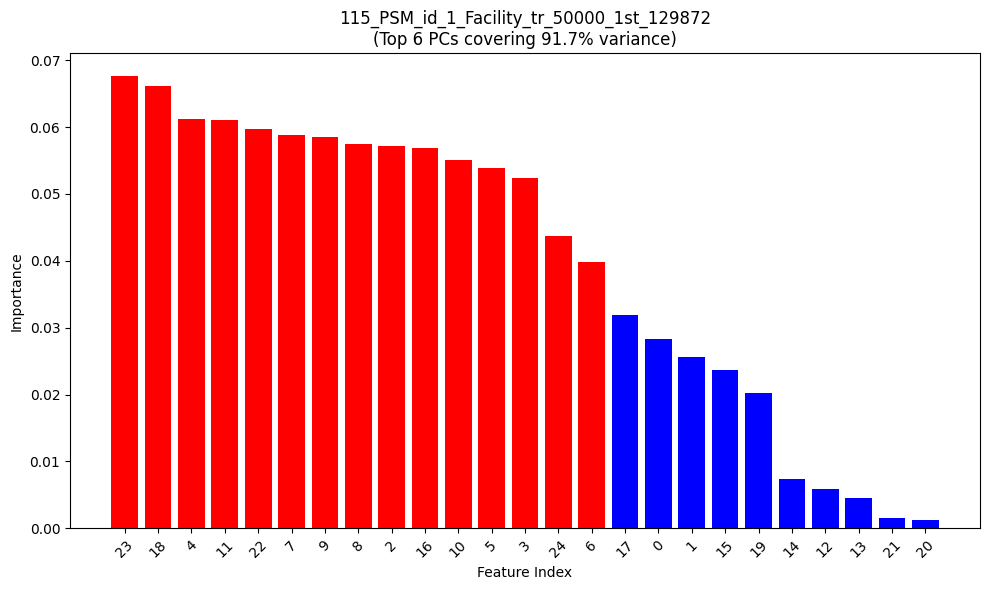

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 247: 0.9273, cluster=1
Feature 233: 0.0054, cluster=0
Feature 236: 0.0036, cluster=0
Feature 205: 0.0000, cluster=0
Feature 194: 0.0000, cluster=0
Feature 200: 0.0000, cluster=0
Selected features (cluster 1): [247]
Selected features (top 20%): [247 233 236  48  71 230  61 231  87  98  58  59  97  99  85 235  74  46
 239  84 240 100  86 246  73  72  60  16  44  56 238  82  38   8  42  95
 245   5  76  77  34 241  70  28  17  15  88  31  36]


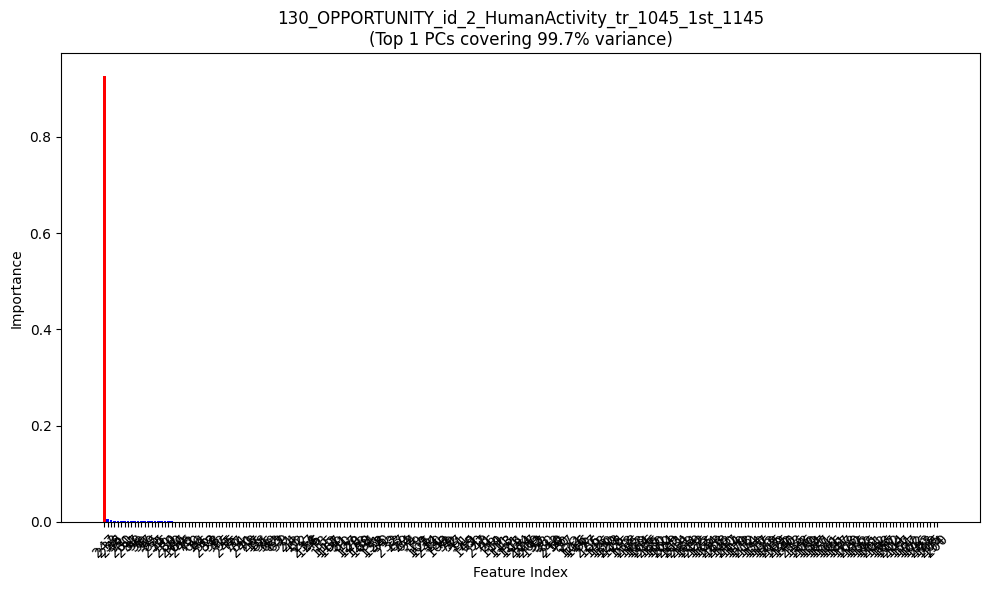

/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Feature importance (sorted)(top-3, bottom-3):
Feature 5: 0.1748, cluster=1
Feature 0: 0.1639, cluster=1
Feature 6: 0.1529, cluster=1
Feature 12: 0.0003, cluster=0
Feature 11: 0.0002, cluster=0
Feature 10: 0.0000, cluster=0
Selected features (cluster 1): [ 5  0  6 21 22 17 18  1  3]
Selected features (top 20%): [ 5  0  6 21 22]


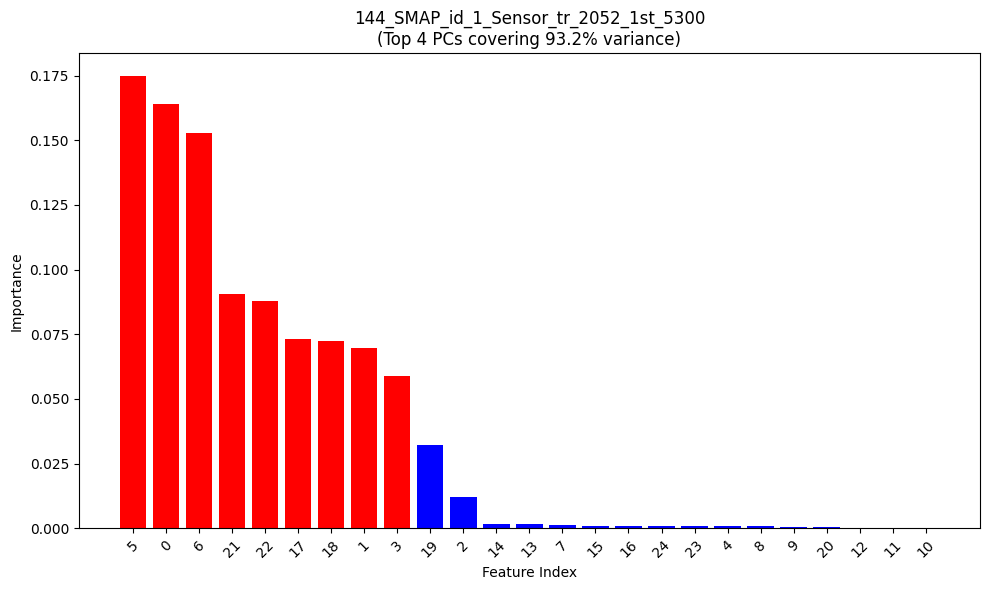

Feature importance (sorted)(top-3, bottom-3):
Feature 7: 0.6047, cluster=1
Feature 8: 0.3909, cluster=1
Feature 3: 0.0021, cluster=0
Feature 6: 0.0000, cluster=0
Feature 5: 0.0000, cluster=0
Feature 1: 0.0000, cluster=0
Selected features (cluster 1): [7 8]
Selected features (top 20%): [7]


/home/hwkang/anaconda3/envs/TSB-AD/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


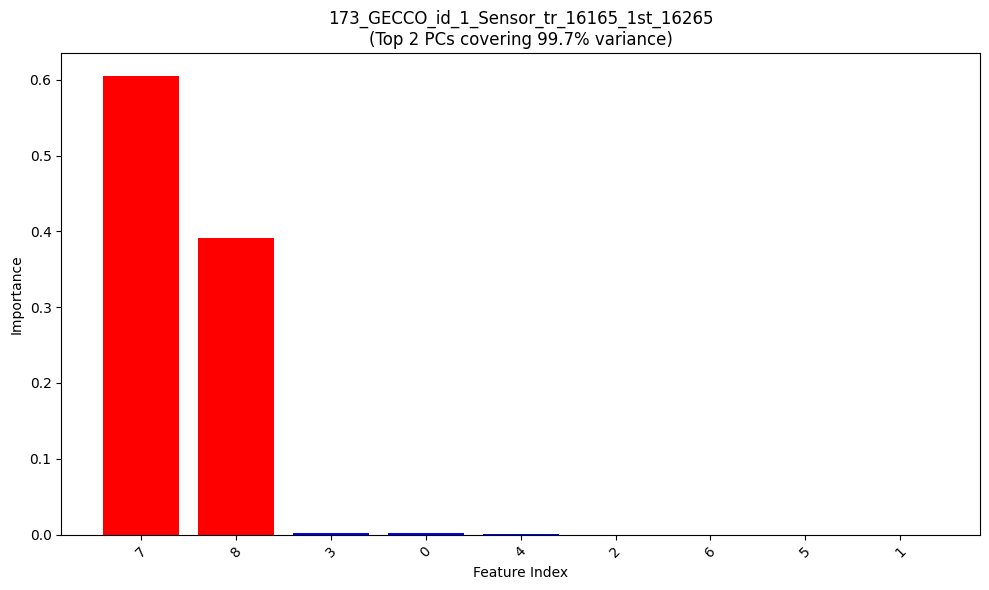

In [95]:
for i, (data, file_path) in enumerate(zip(datas, src_file_paths)):
    title = os.path.basename(file_path).split('.')[0]
    plot_pca(data, title, plot=True)